<a href="https://colab.research.google.com/github/rinikhaneja/machine-learning-with-python/blob/main/Coffe_Shop_Revenue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective :
The goal of this project is to predict the daily revenue of a coffee shop based on key business metrics such as -

Number of Customers
Average Order Value
Marketing Spendings
Operational Hours
Other shop-level performance indicators


Approach :
1. Linear Regression (Regression Model)

Started with exploring the relationship between Daily Revenue and Average Sales Per Day.
The scatterplot revealed a clear positive linear trend, making Linear Regression a strong candidate with R² score of 0.91, meaning 91% of the variation in daily revenue is explained by our features.

2. Logistic Regression (Classification Approach)

For a classification perspective, we transformed the dataset into a binary target:
1 for High Revenue
0 for Low Revenue
The model produced an AUC score of 0.98.
A feature importance plot confirmed that Avg Sales Per Day was the most impactful predictor.

3. Random Forest Classifier

Further experimentation with a Random Forest Classifier showed:
Balanced precision, recall, and F1-scores


Key Conclusions :
1. Linear Regression remains the best fit for this dataset due to the strong linear correlation between features and the target variable.
2. Logistic Regression and Random Forest offered valuable insights into feature impacts and classification performance.
3. Average Sales Per Day consistently emerged as the most influential feature across all models.








In [ ]:
# Importing the pandas library for data manipulation and analysis.
import pandas as pd

# Importing the statsmodels library for building and analyzing statistical models.
import statsmodels.api as sm

# Importing the matplotlib.pyplot module for creating static, interactive, and animated visualizations in Python.
import matplotlib.pyplot as plt

# Importing the seaborn library for making statistical graphics in Python. It is based on matplotlib.
import seaborn as sns

# Importing the numpy library for numerical operations on arrays and matrices.
import numpy as np

# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Importing the LogisticRegression class from sklearn.linear_model to perform logistic regression.
from sklearn.linear_model import LogisticRegression

# Importing the RandomForestRegressor class from sklearn.ensemble.
from sklearn.ensemble import RandomForestRegressor

# Importing the train_test_split function
from sklearn.model_selection import train_test_split

#Imports for scaling the Data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler



In [ ]:
#Importing the csv file from github, and show top 5 rows of dataset.

url = 'https://raw.githubusercontent.com/rinikhaneja/machine-learning-with-python/dev/coffee_shop_revenue.csv'
coffee_shop_data = pd.read_csv(url)

coffee_shop_data.head()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42


# Data Cleaning - On observing the dataset "NO" Such Missing values, imbalances and biases found.

In [ ]:
# Check for missing values in the dataset,
# further observing the data set there are no dummy variables and biases found.
coffee_shop_data.isnull().sum()

,0
Number_of_Customers_Per_Day,0
Average_Order_Value,0
Operating_Hours_Per_Day,0
Number_of_Employees,0
Marketing_Spend_Per_Day,0
Location_Foot_Traffic,0
Daily_Revenue,0


# Linear Regression

In [ ]:
#This will show the number of rows and columns in the DataFrame (rows, columns).
coffee_shop_data.shape

(2000, 7)

<Axes: xlabel='Number_of_Customers_Per_Day', ylabel='Daily_Revenue'>

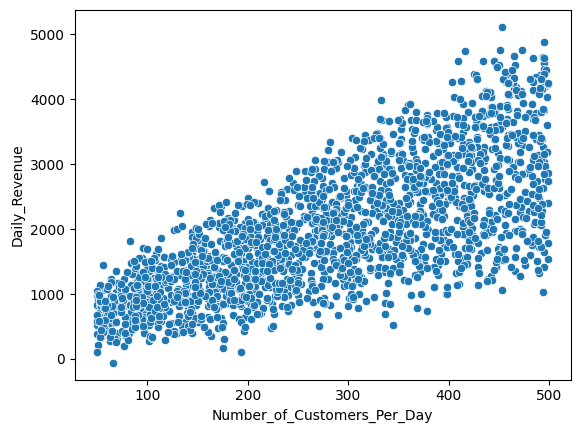

In [ ]:
#Plot the target var and independent var graph to fine tune and validate the dataset.

sns.scatterplot(y='Daily_Revenue', x='Number_of_Customers_Per_Day', data=coffee_shop_data)

<Axes: xlabel='Average_Order_Value', ylabel='Daily_Revenue'>

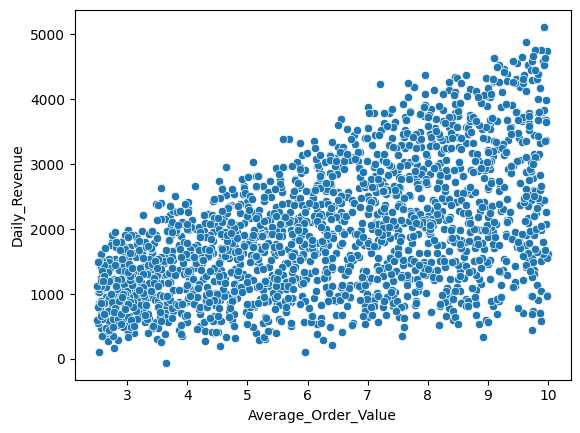

In [ ]:
sns.scatterplot(y='Daily_Revenue', x='Average_Order_Value', data=coffee_shop_data)

<Axes: xlabel='Marketing_Spend_Per_Day', ylabel='Daily_Revenue'>

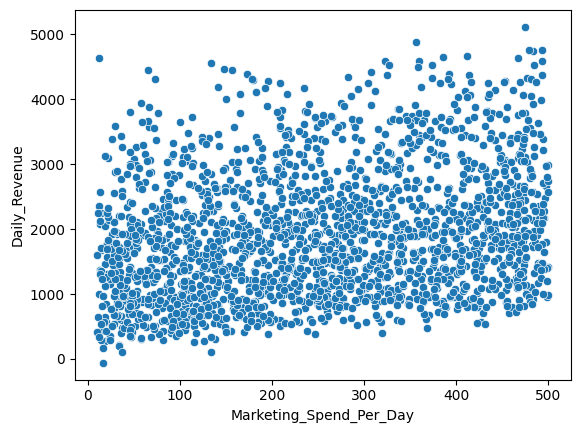

In [ ]:
sns.scatterplot(y='Daily_Revenue', x='Marketing_Spend_Per_Day', data=coffee_shop_data)

In [ ]:
#On observing the dataset and above scatter plots, daily revenue's prediction depends largely on the Average_Order_Value and Number_of_Customers_Per_Day.
#To calsulate the avg sales per day I have taken product of two column values
coffee_shop_data['Avg_Sales_Per_Day'] = coffee_shop_data['Average_Order_Value'] * coffee_shop_data['Number_of_Customers_Per_Day']



<Axes: xlabel='Avg_Sales_Per_Day', ylabel='Daily_Revenue'>

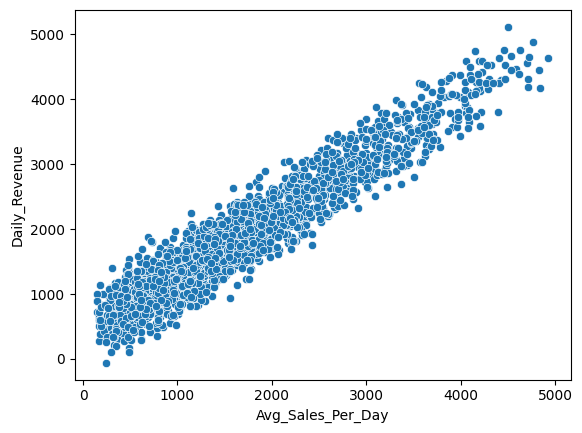

In [ ]:
sns.scatterplot(y='Daily_Revenue', x='Avg_Sales_Per_Day', data=coffee_shop_data)

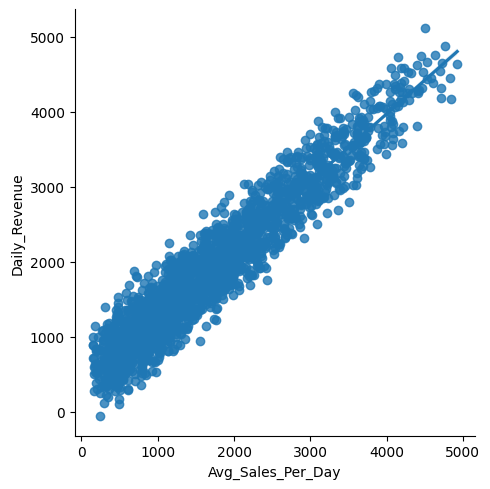

In [ ]:
# This plot will also include a regression line indicating the trend or relationship between the two variables.
sns.lmplot(y='Daily_Revenue', x='Avg_Sales_Per_Day', data=coffee_shop_data)

**Above scatterplots are showing that increase in independent var increases the revenue also. Most recent graph shows an upward slope with very less scatter. This suggests that customer count multiplied by Avg order value is strongly impacting daily revenue. **


In [ ]:
coffee_shop_data.head()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue,Avg_Sales_Per_Day
0,152,6.74,14,4,106.62,97,1547.81,1024.48
1,485,4.50,12,8,57.83,744,2084.68,2182.50
2,398,9.09,6,6,91.76,636,3118.39,3617.82
3,320,8.48,17,4,462.63,770,2912.20,2713.60
4,156,7.44,17,2,412.52,232,1663.42,1160.64


In [ ]:
#Adding the constant
y = coffee_shop_data['Daily_Revenue']

X = coffee_shop_data[['Avg_Sales_Per_Day']]

X = sm.add_constant(X)
X.head()

,const,Avg_Sales_Per_Day
0,1.0,1024.48
1,1.0,2182.50
2,1.0,3617.82
3,1.0,2713.60
4,1.0,1160.64


In [ ]:
#Applying the linear regression model
model = sm.OLS(y, X)

results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:          Daily_Revenue   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 2.025e+04
Date:                Thu, 17 Apr 2025   Prob (F-statistic):               0.00
Time:                        01:14:25   Log-Likelihood:                -14195.
No. Observations:                2000   AIC:                         2.839e+04
Df Residuals:                    1998   BIC:                         2.840e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               376.4011     12.65

# Scaling

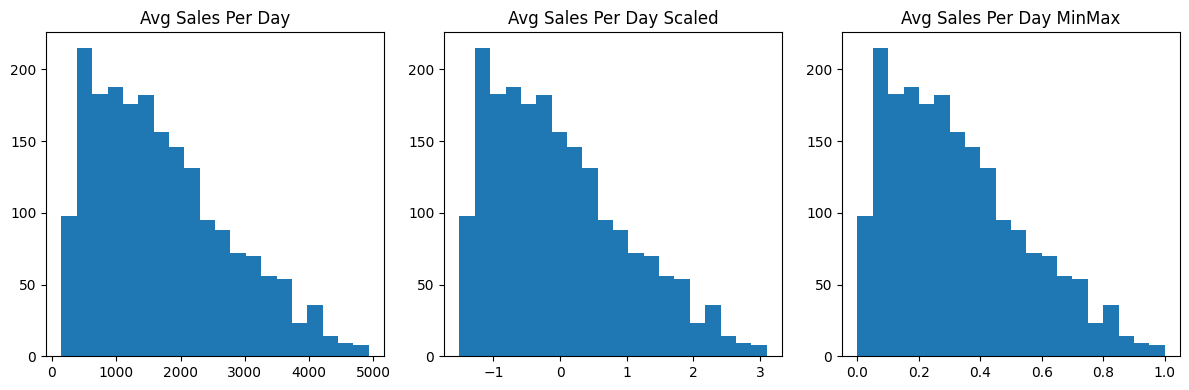

In [ ]:
# Assuming 'X' is your DataFrame and 'Avg_Sales_Per_Day' is the column you want to scale
scaler = StandardScaler()
min_max = MinMaxScaler(feature_range=(0, 1))  # You can adjust the range if needed

# Fit and transform 'Avg_Sales_Per_Day' using the scaler
X['Avg_Sales_Per_Day_scaled'] = scaler.fit_transform(X[['Avg_Sales_Per_Day']])
X['Avg_Sales_Per_Day_min_max'] = min_max.fit_transform(X[['Avg_Sales_Per_Day']])

# Create histograms for the Avg_Sales_Per_Day, Avg_Sales_Per_Day_scaled, and Avg_Sales_Per_Day_min_max columns
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(X['Avg_Sales_Per_Day'], bins=20)
plt.title('Avg Sales Per Day')

plt.subplot(1, 3, 2)
plt.hist(X['Avg_Sales_Per_Day_scaled'], bins=20)
plt.title('Avg Sales Per Day Scaled')

plt.subplot(1, 3, 3)
plt.hist(X['Avg_Sales_Per_Day_min_max'], bins=20)
plt.title('Avg Sales Per Day MinMax')

plt.tight_layout()
plt.show()





# Logistic Regression

In [ ]:
# The data set taken is quite simple with numeric values and no categorical data column is present therefore,
# using logistic regression or random forest classifier models for prediction was not possible therefore Im creating
# a threshold value for the Daily Revenue by calculating median value for Revenue and converting into classifier data
# with High Revenue, Low Revenue.

# X and y (X: features, y: Daily_Revenue)

# Create a binary target variable,
# define a threshold for 'Daily_Revenue' to create a binary classification problem.
# Revenue above the median as 'high' (1) and below as 'low' (0).

median_revenue = y.median()
print('Median revenue value: ' + str(median_revenue))
y_binary = (y > median_revenue).astype(int)
coffee_shop_data['y_binary'] = y_binary
print(y_binary)


Median revenue value: 1770.775
0       0
1       1
2       1
3       1
4       0
       ..
1995    1
1996    0
1997    0
1998    1
1999    0
Name: Daily_Revenue, Length: 2000, dtype: int64


Since, we have taken median of daily revenue for high and low values, the high and low vals are already in equal percentages. (50-50)%

In [ ]:
coffee_shop_data.y_binary.value_counts()


,count
y_binary,
0,1000
1,1000


In [ ]:
from sklearn.preprocessing import LabelEncoder
coffee_shop_data['y_binary'] = LabelEncoder().fit_transform(coffee_shop_data.y_binary)


In [ ]:
X = coffee_shop_data[['Number_of_Customers_Per_Day', 'Average_Order_Value','Avg_Sales_Per_Day']]
X

,Number_of_Customers_Per_Day,Average_Order_Value,Avg_Sales_Per_Day
0,152,6.74,1024.48
1,485,4.50,2182.50
2,398,9.09,3617.82
3,320,8.48,2713.60
4,156,7.44,1160.64
...,...,...,...
1995,372,6.41,2384.52
1996,105,3.01,316.05
1997,89,5.28,469.92
1998,403,9.41,3792.23


In [ ]:
# Normalizing the 'Number_of_Customers_Per_Day' column in the DataFrame 'X'.
# Each value in the 'Number_of_Customers_Per_Day' column is divided by the mean of the entire column.
# This operation standardizes the values around the mean, which can be beneficial for certain statistical analyses or machine learning algorithms.
X['Number_of_Customers_Per_Day'] = X.Number_of_Customers_Per_Day / X.Number_of_Customers_Per_Day.mean()

X['Average_Order_Value'] = X.Average_Order_Value / X.Average_Order_Value.mean()


X['Avg_Sales_Per_Day'] = X.Avg_Sales_Per_Day / X.Avg_Sales_Per_Day.mean()



<ipython-input-20-8cceb663f11a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Number_of_Customers_Per_Day'] = X.Number_of_Customers_Per_Day / X.Number_of_Customers_Per_Day.mean()
<ipython-input-20-8cceb663f11a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Average_Order_Value'] = X.Average_Order_Value / X.Average_Order_Value.mean()
<ipython-input-20-8cceb663f11a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [ ]:
y = coffee_shop_data.y_binary
y

,y_binary
0,0
1,1
2,1
3,1
4,0
...,...
1995,1
1996,0
1997,0
1998,1


In [ ]:
#Split data into training and testing sets
X_train, X_temp, y_binary_train, y_binary_temp = train_test_split(
    X, y_binary, test_size=0.40)
X_val, X_test, y_binary_val, y_binary_test = train_test_split(
    X_temp, y_binary_temp, test_size=0.625)

# X_train, y_train - Training set
# X_val, y_val - Validation set
# X_test, y_test - Test set

<ipython-input-23-5e291b1b567d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(predictions)


<Axes: ylabel='Density'>

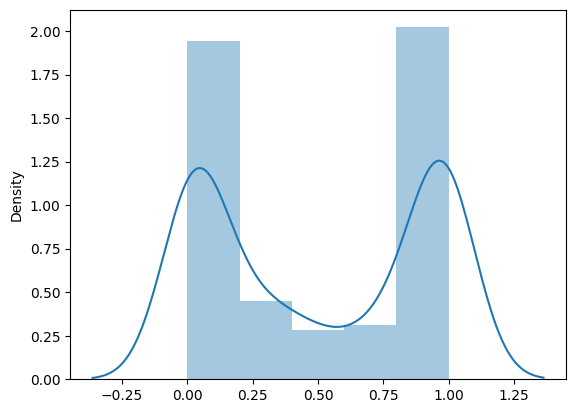

In [ ]:
#Train Logistic Regression model
clf = LogisticRegression(penalty='l2', random_state=42).fit(X_train, y_binary_train)

predictions = clf.predict_proba(X_test)[:, 1]

sns.distplot(predictions)

In [ ]:
# Using the trained classifier 'clf' to predict the probabilities for each class given the test data 'X_test'.
# The 'predict_proba' method returns an array where each row corresponds to a sample in X_test.
# Each column in the output represents the probability of that sample belonging to a corresponding class.
y_pred = clf.predict_proba(X_test)

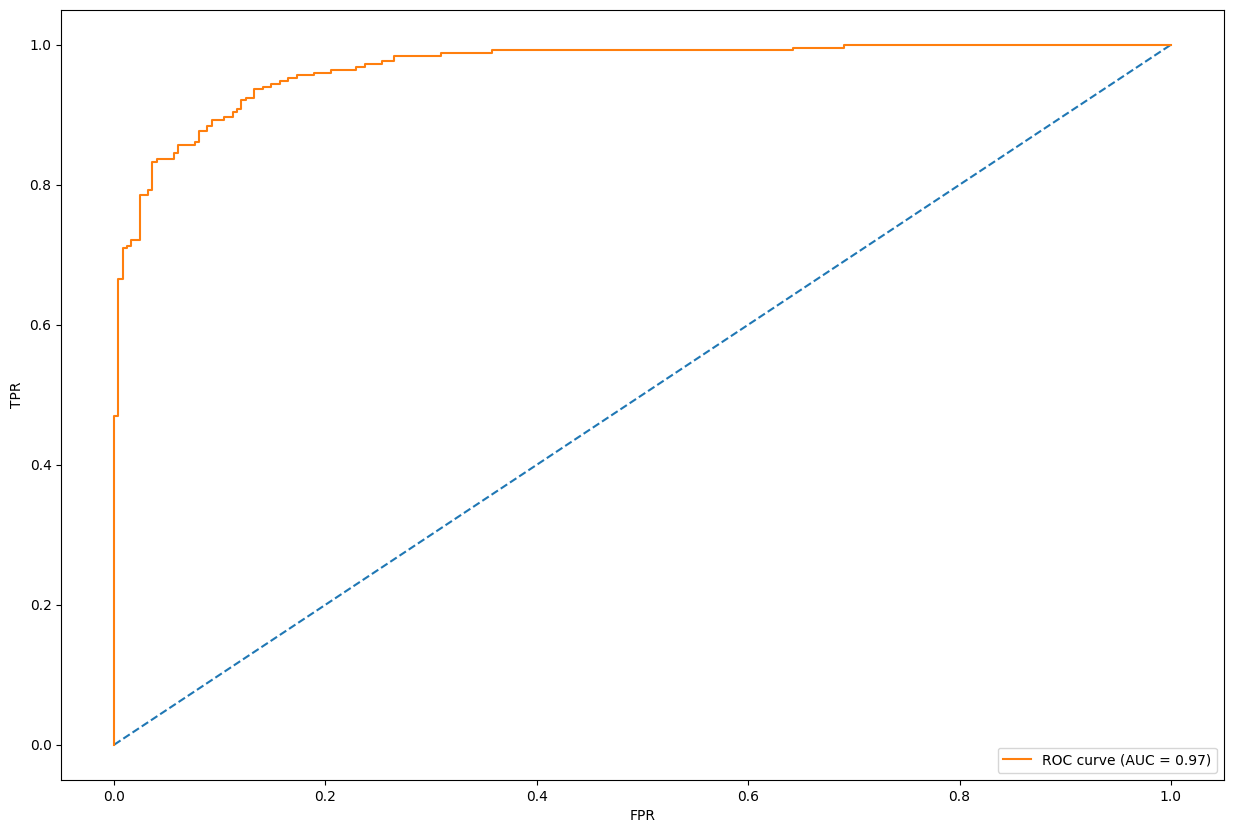

In [ ]:
# Importing roc_curve from sklearn.metrics to compute the receiver operating characteristic (ROC) curve.
from sklearn.metrics import roc_curve, roc_auc_score


# Calculate the Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
# The 'roc_auc_score' function computes the ROC AUC score, which is a measure of the model's performance.
# A higher AUC value indicates better model performance.
auc = roc_auc_score(y_binary_test, predictions)

# Calculate the ROC curve, which includes the False Positive Rate (FPR), True Positive Rate (TPR), and threshold values.
# The 'roc_curve' function returns the FPR, TPR, and thresholds for various decision boundaries given by 'predictions'.
fpr, tpr, _ = roc_curve(y_binary_test, predictions)

# Initialize a new figure with a specified size to plot the ROC curve.
plt.figure(figsize=(15, 10))

# Plot a diagonal line that represents a no-skill classifier (random guessing).
# This serves as a baseline against which the model's ROC curve can be compared.
plt.plot([0, 1], [0, 1], linestyle='--')

# Plot the ROC curve for the model using the calculated FPR and TPR.
# Label the curve with the AUC score rounded to two decimal places.
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)

# Set the X-axis label to 'False Positive Rate (FPR)'.
plt.xlabel('FPR')

# Set the Y-axis label to 'True Positive Rate (TPR)'.
plt.ylabel('TPR')

# Display the legend in the lower right corner of the plot.
# The legend contains information about the plotted lines, such as the label 'ROC curve'.
plt.legend(loc='lower right')

# Render the plot to the screen.
# This will display the figure with the ROC curve and all the labels and annotations.
plt.show()


                       Feature  Importance
2            Avg_Sales_Per_Day    5.831818
1          Average_Order_Value    2.242547
0  Number_of_Customers_Per_Day    1.905003


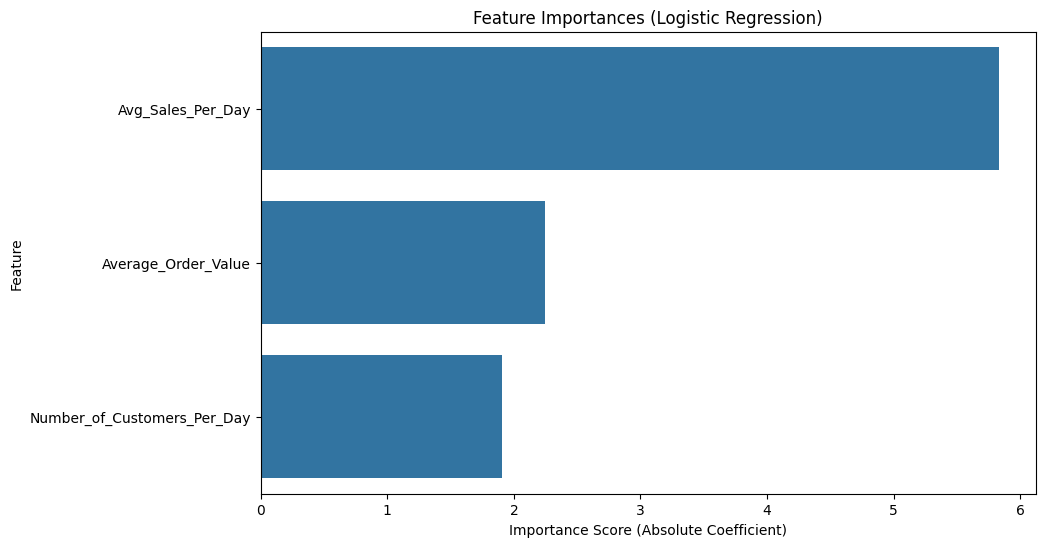

In [ ]:
#Get feature importances (absolute values of coefficients)
feature_importances = np.abs(clf.coef_[0])

#Create DataFrame for feature importances
feature_importance_df = pd.DataFrame(
    {'Feature': X.columns, 'Importance': feature_importances}
)

#Sort by importance
feature_importance_df = feature_importance_df.sort_values(
    by='Importance', ascending=False
)

#Print and visualize
print(feature_importance_df)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances (Logistic Regression)')
plt.xlabel('Importance Score (Absolute Coefficient)')
plt.ylabel('Feature')
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

print(rf_model)

rf_model.fit(X_train, y_binary_train)
pred_rf = rf_model.predict_proba(X_test)[:,1]

RandomForestClassifier()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_binary_test, pred_rf.round(0)))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       249
           1       0.91      0.89      0.90       251

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500



In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_binary_test, pred_rf)
print('R-squared: ' + str(r2))

R-squared: 0.71542984687755
